<a href="https://colab.research.google.com/github/ibshafique/mlops_with_poridhi/blob/main/prerequisite_projects/WQU_DS/01_housing_in_mexico/mexico_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

## Importing Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Importing Datasets

In [2]:
url_1 = "https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/WQU_DS/01_housing_in_mexico/dataset/mexico-real-estate-1.csv"
url_2 = "https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/WQU_DS/01_housing_in_mexico/dataset/mexico-real-estate-2.csv"
url_3 = "https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/WQU_DS/01_housing_in_mexico/dataset/mexico-real-estate-3.csv"

In [3]:
df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df3 = pd.read_csv(url_3)

# Data Insights

## Dataset 1

In [4]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [5]:
df1.shape

(700, 6)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB


## Dataset 2

In [7]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,apartment,Puebla,NaN,NaN,190,2500000
2,house,Morelos,23.634501,-102.552788,360,5300000
3,house,Morelos,NaN,NaN,76,820000
4,house,Puebla,NaN,NaN,200,1100000


In [8]:
df2.shape

(700, 6)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 32.9+ KB


## Dataset 3

In [10]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [11]:
df3.shape

(700, 5)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


# Data Cleaning

From the cell above we see that not all of our datasets have the same consistency. There are some missing values, different currency values of house prices and different location naming systems. We need to clean this data to make it consistent.

## Cleaning df1

In [13]:
# df1 has a few of missing values, so we will remove those rows with missing values
print('Shape of df1 before cleaning: ', df1.shape)
df1.dropna(inplace=True)
print('Shape of df1 after cleaning: ', df1.shape)

# the 'price_usd' column has $ infront of every values and commas, we need to drop these
df1['price_usd'] = df1['price_usd'].str.replace('$', '')
df1['price_usd'] = df1['price_usd'].str.replace(',', '')
df1.head()

Shape of df1 before cleaning:  (700, 6)
Shape of df1 after cleaning:  (583, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


## Cleaning df2

In [14]:
# removing rows with missing values in df2
print('Shape of df2 before cleaning: ', df2.shape)
df2.dropna(inplace=True)
print('Shape of df2 after cleaning: ', df2.shape)

# df2 has the price in Mexican Pesos instead of US Dollars.
# 1USD = 19MXN
df2['price_usd'] = (df2['price_mxn'] / 19).round(2)

#dropping 'price_mxn' column
df2.drop(columns=['price_mxn'], inplace=True)
df2.head()

Shape of df2 before cleaning:  (700, 6)
Shape of df2 after cleaning:  (571, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


## Cleaning df3

In [15]:
# removing rows with missing values in df3
print('Shape of df3 before cleaning: ', df3.shape)
df3.dropna(inplace=True)
print('Shape of df3 after cleaning: ', df3.shape)

# in df3, the naming system of the location of the property is different
# we will clean this to make the data consistent
df3['state'] = df3['place_with_parent_names'].str.split('|').str[2]

# dropping 'place_with_parent_names' column
df3.drop(columns= 'place_with_parent_names', inplace=True)

# breaking the 'lat-lon' column to 2 columns 'lat' and 'lon'
df3['lat'] = df3['lat-lon'].str.split(',').str[0]
df3['lon'] = df3['lat-lon'].str.split(',').str[1]

# dropping 'lat-lon' column
df3.drop(columns='lat-lon', inplace=True)

df3.head()

Shape of df3 before cleaning:  (700, 5)
Shape of df3 after cleaning:  (582, 5)


,property_type,area_m2,price_usd,state,lat,lon
0,apartment,71,48550.59,Distrito Federal,19.52589,-99.151703
1,house,233,168636.73,Estado de México,19.2640539,-99.5727534
2,house,300,86932.69,Estado de México,19.268629,-99.671722
4,apartment,84,68508.67,Veracruz de Ignacio de la Llave,19.511938,-96.871956
5,house,175,102763.00,Jalisco,20.689157,-103.366728


# Concatenate DataFrames


We are concetenating the 3 dataframes (df1, df2 and df3)to make df.

In [16]:
# Concatenate df1, df2, and df3
df = pd.concat([df1, df2, df3])

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


In [17]:
  df["price_usd"] = df.price_usd.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   object 
 3   lon            1736 non-null   object 
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.9+ KB


---

# Data Visualization

We are plotting the properties in a map. When we hover the mouse over each of them, the price will show up.

In [19]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat='lat',
    lon='lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=800,  # Width of map
    height=800,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [20]:
df['state'].value_counts()

,count
state,
Distrito Federal,303
Estado de México,179
Yucatán,171
Morelos,160
Querétaro,128
Veracruz de Ignacio de la Llave,117
Puebla,95
Nuevo León,83
Jalisco,60


In [21]:
df[["area_m2" , "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


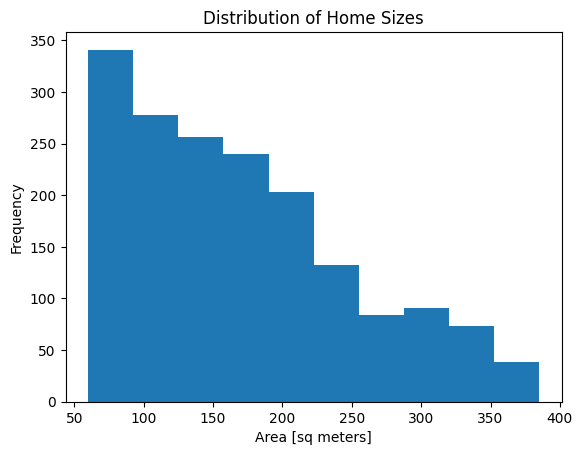

In [22]:
plt.hist(df['area_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Sizes')
plt.show()

Text(0.5, 1.0, 'Distribution of Home Sizes')

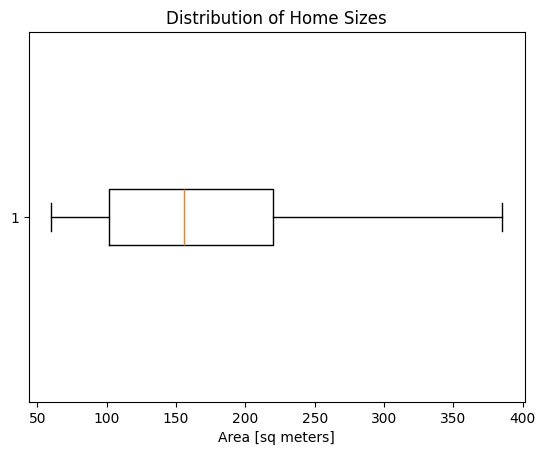

In [23]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"], vert=False);

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

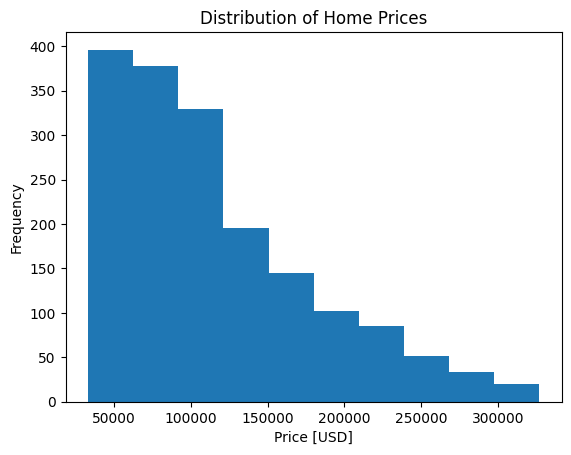

In [24]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])

# Add x-axis label
plt.xlabel("Price [USD]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

Text(0.5, 1.0, 'Distribution of Home Prices')

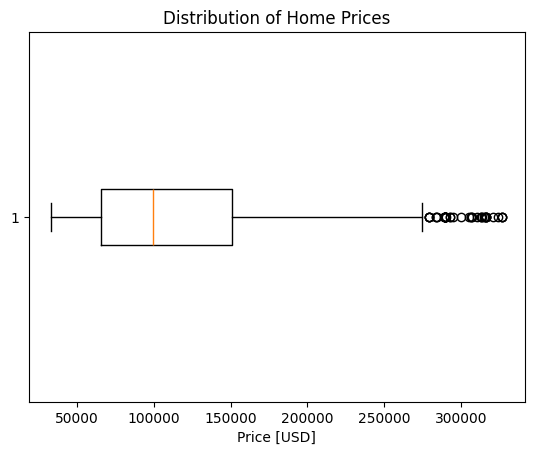

In [25]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)

# Add x-label axis
plt.xlabel("Price [USD]")

# Add y-label axis
plt.title("Distribution of Home Prices")